In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib as mpl
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
from datetime import datetime, timedelta
import warnings
import datetime
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
mpl.style.use('seaborn')
pd.set_option('display.max_columns', 1000)
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv("aud_usd_h4_h1_all_merged_corr_0.1_v1.csv")
df.columns = df.columns.str.replace('.','_')

In [3]:
df[['bid_close_x','class_target1','target1_x','target2_x','target3_x']].head(10)

bid_close_x  class_target1  target1_x  target2_x  target3_x
0       0.9124             -1     0.9117     0.9135     0.9142
1       0.9117              1     0.9135     0.9142     0.9142
2       0.9135              1     0.9142     0.9142     0.9156
3       0.9142              0     0.9142     0.9156     0.9184
4       0.9142              1     0.9156     0.9184     0.9196
5       0.9156              1     0.9184     0.9196     0.9236
6       0.9184              1     0.9196     0.9236     0.9205
7       0.9196              1     0.9236     0.9205     0.9187
8       0.9236             -1     0.9205     0.9187     0.9190
9       0.9205             -1     0.9187     0.9190     0.9181

In [4]:
df=df.dropna(how='all',axis=1)
df.shape

(14028, 839)

In [5]:
df['time_local']=df['time_local'].astype(str).str[:-6]

In [6]:
df['year']=pd.DatetimeIndex(df['time_local']).year
df['month']=pd.DatetimeIndex(df['time_local']).month
df['day']=pd.DatetimeIndex(df['time_local']).day
df['hour']=pd.DatetimeIndex(df['time_local']).hour
df['dayofweek']=pd.DatetimeIndex(df['time_local']).dayofweek



In [7]:
df[df['year']==2018][['bid_close_x','class_target1','target1_x','target2_x','target3_x']].head(20)

bid_close_x  class_target1  target1_x  target2_x  target3_x
12440       0.7800              0     0.7800     0.7805     0.7803
12441       0.7800             -1     0.7805     0.7803     0.7818
12442       0.7805             -1     0.7803     0.7818     0.7839
12443       0.7803              1     0.7818     0.7839     0.7834
12444       0.7818              1     0.7839     0.7834     0.7819
12445       0.7839             -1     0.7834     0.7819     0.7823
12446       0.7834             -1     0.7819     0.7823     0.7829
12447       0.7819             -1     0.7823     0.7829     0.7821
12448       0.7823              1     0.7829     0.7821     0.7821
12449       0.7829             -1     0.7821     0.7821     0.7834
12450       0.7821              0     0.7821     0.7834     0.7839
12451       0.7821              1     0.7834     0.7839     0.7839
12452       0.7834              1     0.7839     0.7839     0.7834
12453       0.7839              0     0.7839     0.7834     0.7818
12454       0.7839             -1     0.7834     0.7818     0.7839
12455       0.7834             -1     0.7818     0.7839     0.7841
12456       0.7818              1     0.7839     0.7841     0.7827
12457       0.7839             -1     0.7841     0.7827     0.7863
12458       0.7841             -1     0.7827     0.7863     0.7863
12459       0.7827              1     0.7863     0.7863     0.7846

In [8]:
df['target_2_val'] = ((df['target2_x']-df['bid_close_x'])/df['bid_close_x'])*100
df.loc[df['target_2_val'] < -0.0005, 'class_target2'] = -1
df.loc[df['target_2_val'] > 0.0005, 'class_target2'] = 1
df.loc[(df['target_2_val']>=-0.0005) & (df['target_2_val']<=0.0005) , 'class_target2'] = 0

In [9]:
df[df['year']==2018][['bid_close_x','class_target1','target1_x','target2_x','target3_x']].head()

bid_close_x  class_target1  target1_x  target2_x  target3_x
12440       0.7800              0     0.7800     0.7805     0.7803
12441       0.7800             -1     0.7805     0.7803     0.7818
12442       0.7805             -1     0.7803     0.7818     0.7839
12443       0.7803              1     0.7818     0.7839     0.7834
12444       0.7818              1     0.7839     0.7834     0.7819

In [10]:
df['class_target2'].value_counts()

 1.0    6943
-1.0    6874
 0.0     211
Name: class_target2, dtype: int64

In [11]:
df['class_target2']=df['class_target2'].fillna(0)

In [12]:
import datetime   
#date = datetime.date.today()
date=pd.datetime.now().strftime("%Y-%m-%d %I:%M:%S")
date

'2019-05-06 01:40:47'

In [13]:
df['today']=date
df['today'] =pd.DatetimeIndex(df['today'])

In [14]:
df['nb_months'] = ((df['today'] - pd.to_datetime(df['time_local'] ))/np.timedelta64(1, 'M'))
df['nb_months'] = df['nb_months'].astype(int)


In [15]:
df['nb_years']  = np.round(df['nb_months'] / 12 )

In [16]:
df['nb_years'].head()

0    9.0
1    9.0
2    9.0
3    9.0
4    9.0
Name: nb_years, dtype: float64

In [17]:
col_drop= df.filter(regex='time').columns

In [18]:
target_cols = df.filter(regex='target').columns

In [19]:
cols_x = df.filter(regex='_x').columns

In [20]:
cols_y = df.filter(regex='_y').columns

In [21]:
cols_year = df.filter(regex='year').columns

In [22]:
cols_year

Index(['year', 'nb_years'], dtype='object')

In [23]:
X=df.drop(['Unnamed: 0','time_local', 'target2_x', 'target3_x', 'target1_y', 'target2_y',
       'target3_y', 'class_target1', 'class_target3',
       'PC_AUD_H4_target1', 'bid_close_y', 'today','target1_x','target_2_val'],axis=1)

In [24]:
X=X.fillna(0)

In [25]:
df_temp=X.select_dtypes(include=['object'])

In [26]:
obj=df_temp.loc[:, df_temp.dtypes =='object']
for col in obj:
    obj[col] = pd.to_numeric(obj[col], errors='coerce')
df_temp[obj.columns]=obj

In [27]:
df_temp=df_temp.replace([np.inf, -np.inf], np.nan)
df_temp=df_temp.fillna(0)
X[df_temp.columns]=df_temp

In [28]:
#X_final= X[X['year'] < 2018]
s=X[['month', 'dayofweek']]
for each in s:
    dummies = pd.get_dummies(s[each], prefix=each, drop_first=False)
    X=X.drop([each],axis=1)
    X = pd.concat([X, dummies], axis=1)

In [29]:
X=X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [30]:
X_pred=X[(X['year'] >= 2018) ]
X_pred.to_csv("X_bid_price_7_2018_26_4_2019_three_class_target2.csv")

In [31]:
all_col=X.columns
drop_col=list(x for x in all_col if 'h1_5' in x or 'h1_6' in x or 'h1_7' in x  )
X=X.drop(columns=drop_col,axis=1)

In [32]:
X_final=X[(X['year'] < 2018) ]

In [33]:
X_final=X.drop(['year'],axis=1)

In [34]:
y=X_final['class_target2']
X1=X_final.drop(['class_target2'],axis=1)

In [35]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(X1)
#X1=scaler.transform(X1)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.seed=0
from sklearn.linear_model import LogisticRegression

In [37]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1)
X2, y1 = smt.fit_sample(X1, y)
len(X2),len(y1)
X2=pd.DataFrame(X2)
y1=pd.DataFrame(y1)
X2.columns=X1.columns

Using TensorFlow backend.


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X2, y1, test_size=0.3,random_state=1,stratify=y1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(14120, 823) (14120, 1)
(6052, 823) (6052, 1)


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_iter_no_change=3)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.52      0.52      0.52      2017
         0.0       0.99      0.96      0.98      2018
         1.0       0.52      0.53      0.53      2017

   micro avg       0.67      0.67      0.67      6052
   macro avg       0.68      0.67      0.67      6052
weighted avg       0.68      0.67      0.67      6052



In [41]:
print(classification_report(y_train,gb.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       0.71      0.71      0.71      4707
         0.0       0.99      0.97      0.98      4706
         1.0       0.71      0.72      0.71      4707

   micro avg       0.80      0.80      0.80     14120
   macro avg       0.80      0.80      0.80     14120
weighted avg       0.80      0.80      0.80     14120



In [42]:
accuracy_score(y_test,y_pred)

0.6728354263053536

In [43]:
accuracy_score(y_train,gb.predict(X_train))

0.8012747875354108

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1056   18  943]
 [  42 1943   33]
 [ 944    0 1073]]


# Final model

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.01,subsample=0.6,n_estimators=120,max_depth=3,n_iter_no_change=3)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
accuracy_score(y_test,y_pred),accuracy_score(y_train,gb.predict(X_train))

(0.6591209517514871, 0.7077195467422096)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.50      0.55      0.52      2017
         0.0       0.98      0.93      0.95      2018
         1.0       0.52      0.50      0.51      2017

   micro avg       0.66      0.66      0.66      6052
   macro avg       0.67      0.66      0.66      6052
weighted avg       0.67      0.66      0.66      6052



In [47]:
print(classification_report(y_train,gb.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       0.57      0.62      0.60      4707
         0.0       0.98      0.93      0.95      4706
         1.0       0.59      0.57      0.58      4707

   micro avg       0.71      0.71      0.71     14120
   macro avg       0.71      0.71      0.71     14120
weighted avg       0.71      0.71      0.71     14120



In [48]:
print(confusion_matrix(y_test,y_pred))

[[1100   35  882]
 [  95 1876   47]
 [ 997    7 1013]]


In [49]:
print(confusion_matrix(y_train,gb.predict(X_train)))

[[2927   64 1716]
 [ 208 4383  115]
 [1996   28 2683]]


In [50]:
feature_importance=pd.DataFrame(gb.feature_importances_)
fetaure_cols=pd.DataFrame(X1.columns)
feature_df=pd.concat([fetaure_cols,feature_importance],axis=1)
feature_df.columns=['col_name','value']
feature_imp_df=feature_df.sort_values(by='value',ascending=False)


In [51]:
features_three_class_bid_price=feature_imp_df[feature_imp_df['value']>0.00001]
features_three_class_bid_price=pd.DataFrame(features_three_class_bid_price)
features_three_class_bid_price.to_csv("features_three_class_bid_price_target2.csv")
features_three_class_bid_price=features_three_class_bid_price['col_name']
X2_1=X2[features_three_class_bid_price]
X2_1=pd.DataFrame(X2_1)
y1_1=pd.DataFrame(y1)
#X2_1.columns=X2_1.columns

In [52]:
X_train, X_test, y_train, y_test= train_test_split(X2_1, y1_1,test_size=0.3,random_state=1,stratify=y1_1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14120, 377) (14120, 1)
(6052, 377) (6052, 1)


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.01,subsample=0.6,n_estimators=120,max_depth=3)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
accuracy_score(y_test,y_pred),accuracy_score(y_train,gb.predict(X_train))

(0.6490416391275612, 0.6991501416430594)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.49      0.55      0.52      2017
         0.0       0.98      0.92      0.95      2018
         1.0       0.51      0.48      0.49      2017

   micro avg       0.65      0.65      0.65      6052
   macro avg       0.66      0.65      0.65      6052
weighted avg       0.66      0.65      0.65      6052



In [55]:
print(classification_report(y_train,gb.predict(X_train)))

              precision    recall  f1-score   support

        -1.0       0.56      0.62      0.59      4707
         0.0       0.98      0.92      0.95      4706
         1.0       0.58      0.55      0.57      4707

   micro avg       0.70      0.70      0.70     14120
   macro avg       0.71      0.70      0.70     14120
weighted avg       0.71      0.70      0.70     14120



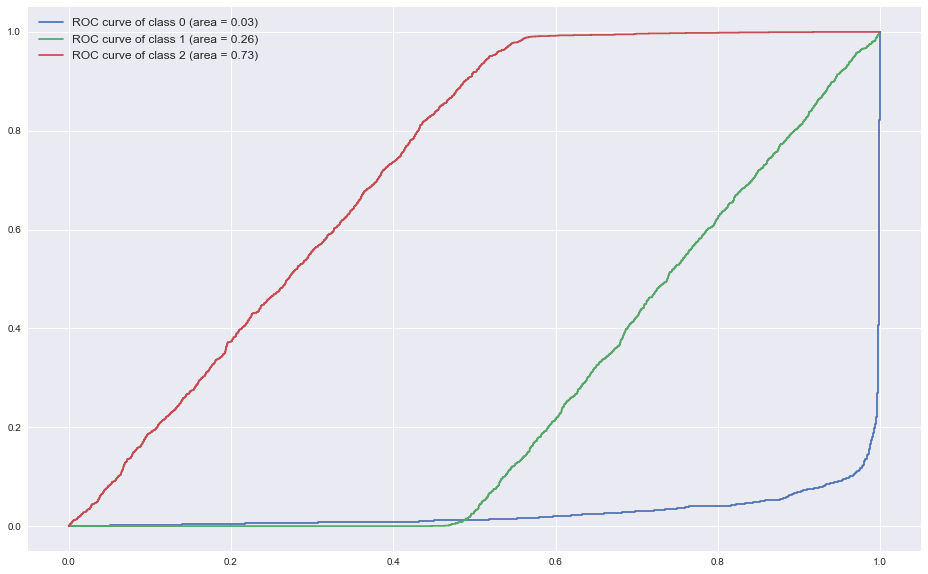

In [56]:
import keras
y_pred_proba=gb.predict_proba(X_test)
y_test_cat = keras.utils.to_categorical(y_test, 3) 
from sklearn.metrics import roc_curve, auc,roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i],  y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) 
fig=plt.figure(figsize=(16, 10))

for i in range(3):

    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    #plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.legend(fontsize=12)
plt.show() 
 


In [57]:
from joblib import dump,load
dump(gb,'gb_3_class_bid_price_target2.joblib') 

['gb_3_class_bid_price_target2.joblib']